In [1]:
def decade(signal):
    timepoints = int(len(signal))
    fft = np.fft.fft(signal)
    peaks, _ = find_peaks(np.abs(fft)[:timepoints // 2] * 1 / timepoints)
    f = np.linspace(0, timepoints, timepoints)
    q = f[:timepoints // 2]
    decad = math.log(max(q[peaks])/min(q[peaks]),10)
    print(decad)

In [5]:
import numpy as np
from scipy.signal import find_peaks
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
t = np.linspace(0, .5, 500)
s = np.sin(4 * 2 * np.pi * t) + np.sin(90 * 2 * np.pi * t) + np.sin(130 * 2 * np.pi * t) + np.sin(430 * 2 * np.pi * t)

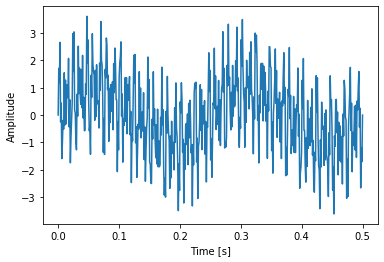

In [61]:
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

In [62]:
decade(s)

2.0314084642516237


In [63]:
from scipy import signal
freqs, psd = signal.welch(s)

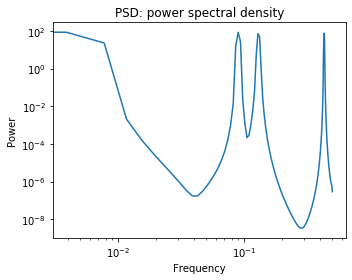

In [66]:
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [71]:
peaks, _ = find_peaks(psd)
print(freqs[peaks])
print(math.log10(max(freqs[peaks])/min(freqs[peaks])))

[0.00390625 0.08984375 0.12890625 0.4296875 ]
2.041392685158225


In [72]:
from hurst import compute_Hc, random_walk

In [73]:
import nolds

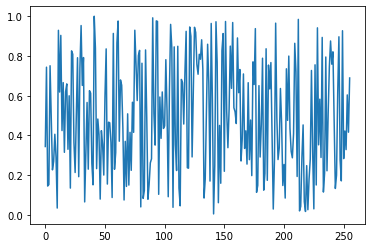

In [77]:
rwalk = np.random.random(256)
h = nolds.dfa(rwalk)
plt.plot(rwalk)

In [78]:
freqs, psd = signal.welch(rwalk)
peaks, _ = find_peaks(psd)
print(math.log10(max(freqs[peaks])/min(freqs[peaks])))

1.7958800173440752


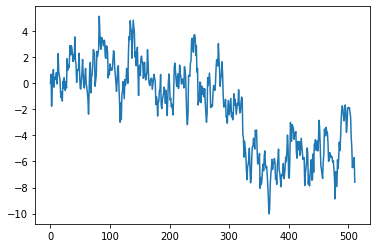

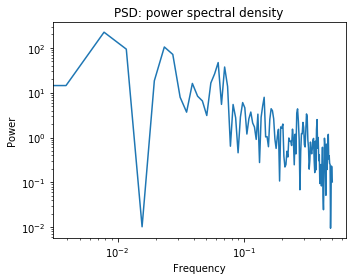

In [85]:
lowh = random_walk(256*2, proba=0.3)
plt.plot(lowh)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [86]:
freqs, psd = signal.welch(lowh)
peaks, _ = find_peaks(psd)
print(math.log10(max(freqs[peaks])/min(freqs[peaks])))

2.100370545117563


In [87]:
decade(lowh)

2.4031205211758175


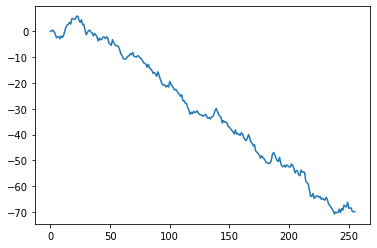

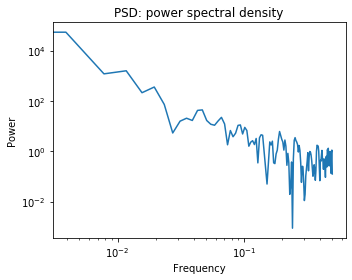

In [105]:
brownian = random_walk(256, proba=0.7)
plt.plot(brownian)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

2.100370545117563


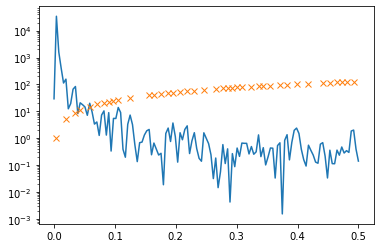

1.1868151244474543


In [116]:
freqs, psd = signal.welch(brownian)
peaks, _ = find_peaks(psd)
print(math.log10(max(freqs[peaks])/min(freqs[peaks])))
plt.plot(freqs, psd)
plt.plot(freqs[peaks], peaks, "x")
plt.yscale('log')
plt.show()
decade(brownian)

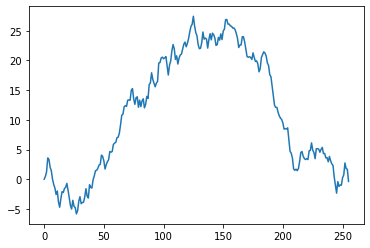

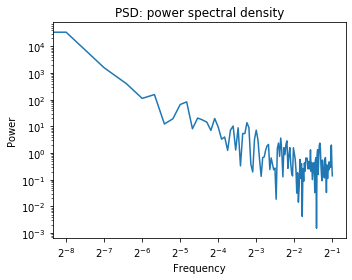

In [165]:
brownian = random_walk(256, proba=0.7)
plt.plot(brownian)
plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd, basex = 2)
plt.title('PSD: power spectral density')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [126]:
rawBOLD = brownian
TR = 2.5

fs = 1/TR #sampling frequency
print('Sampling frequency =', fs)
n = len(rawBOLD) #number of timepoints
print('Number of timepoints =', n)

    #NORMALIZE TIME SERIES
mean_rawBOLD = np.mean(rawBOLD)
rawBOLD_norm = rawBOLD - mean_rawBOLD #rawBOLD normalized by subtracting mean from every data point
print('Mean rawBOLD =', mean_rawBOLD)
    
   #PARABOLIC WINDOW
N = len(rawBOLD_norm)
W = np.zeros((N,1))
for j in np.arange(0,N):
    W[j] = 1 - np.power((2*(j + 1)/(N+1)-1),2)
#multiply each normalized value by parabolic window to get windowed signal
signal_pw = [a * b for a, b in zip(rawBOLD_norm, W)]
    
#END MATCHING
y_first = signal_pw[0] 
y_last = signal_pw[-1]
slope_ends = (y_last - y_first)/(N-1)
y_int = y_last - slope_ends*N
x_values = np.arange(1,N+1)
#line equation is line connecting first and last points of signal_pw
line_eq = slope_ends * x_values + y_int
 
#BRIDGE DETRENDING
#subtract transposed line equation from signal_pw
signal_em1 = signal_pw - line_eq[:, np.newaxis]

#PARAMETERS FOR FFT
#range is first half of signal
range = math.ceil((N+1)/2)
#frequency vector is sample freq times (0-range)/N
freq_row_vector = fs * np.arange(0,range)/N
#transpose freq_row_vector to get freq in column format
freq = freq_row_vector[:,np.newaxis]
#signal_em1 is the signal after lowPSDwe has been applied, use this signal for PSD
  
#FFT
#estimate the power spectral amplitude function A(f)^2 from FFT algorithm on X(t)
#plot of log(power) vs. log(frequency) needs to be linear over a 2-decade range 
fftSignal = np.fft.fft(signal_em1,N)
#take first half of signal because symmetric
fftSignal1 = fftSignal[0:range] 
PSD = np.power(abs(fftSignal1),2)/N
if N%2:
    PSD[2:] = PSD[2:]*2
else:
    PSD[2:-1] = PSD[2:-1]*2

Sampling frequency = 0.4
Number of timepoints = 256
Mean rawBOLD = -29.851714897939083


In [154]:
decade(np.squeeze(np.array(signal_em1)))

2.093421685162235


In [155]:
decade(brownian)

1.0142404391146103


In [157]:
math.log(100,10)

2.0

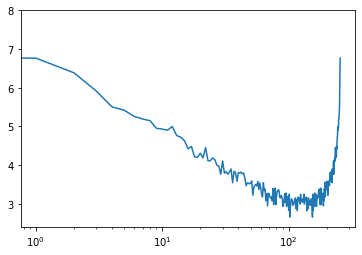

In [164]:
TR = 2.5
freq = 1/TR
fft = np.fft.fft(brownian)
absolutefft = np.abs(fft)
absolutefftsq = np.square(absolutefft)
afslog = np.log10(absolutefftsq)
#fft0 = np.fft.fft(freq)
#absolutefft0 = np.abs(fft0)
#absolutefft0sq = absolutefft0**2
#afs0log = math.log(absolutefft0sq)
plt.plot(afslog)
plt.xscale('log')